In [51]:
# OneWay ANOVA 单因素方差检验
# 用来比较不同分组的数据是否有显著的差异F值（F值 = 组间差异 / 组内差异）
# 以及这种显著差异是随机的可能性有多大P值（P越小，说明这种差异越不是随机，而是相关的）
# 用法，修改以下超参数即可
# 超参数
VAULE_X = 'wc_night'
VAULE_Y = 'amount'
COLS_ALL = ['date', 'amount', 'refuelLiters', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays', 'encoded_wc_night', 'code_week', 'encoded_holidays', '305_price','313_price' ]

import pandas as pd

# 读取excel文件并获取指定列
# df = pd.read_csv('Data\结果1_全站按日数据_最近2年数据.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays'], encoding='GBK')
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')

In [52]:
#删除春节和元旦数据


# 使用 groupby 函数按天气分组，并获取每组的销量数据
value_X = VAULE_X
value_Y = VAULE_Y
coloum_groups = df.groupby(value_X)[value_Y].apply(list)
# 打印结果
for coloum, sales_array in coloum_groups.items():
    print(f"{coloum} 的销量数组: {sales_array}")

东北风 的销量数组: [352429614.8, 364123637.2, 382027837.5, 351099376.4, 323257827.4, 303701430.6, 408201311.5, 347276374.4, 389112152.5, 352086177.7]
东南风 的销量数组: [386938985.1, 271284119.0, 351609569.4, 355137082.9, 398291277.9, 381503210.1, 282068419.7, 329852976.2, 468015946.1, 280032597.8, 331553937.0, 409122285.7, 345688432.0, 360467330.0, 337572326.6, 351161237.9, 334376077.8, 353793196.1, 347814645.7, 368930944.4, 340802337.5, 350429586.0, 355884776.1, 349113754.8, 343521224.0, 334726597.3, 384774885.0, 393256732.9, 369180162.2, 416421123.9, 339270976.3, 341962362.8, 720363247.4, 358707609.5, 380371155.5, 332650380.5, 345610407.9, 460528935.9, 604564550.4, 448474979.6, 371709160.3, 387801535.1, 407508343.2, 333406814.6, 314914431.5, 306126803.1, 313443632.7, 337914082.2, 317473294.8, 320333494.7, 337588322.4, 302427178.1, 276767353.7, 306932494.3, 399489811.6, 590650200.2, 342427421.7, 427044086.7, 403281160.1, 381276642.4, 316719583.5, 352142685.8, 389963544.2, 466214358.2, 451267469.6, 4

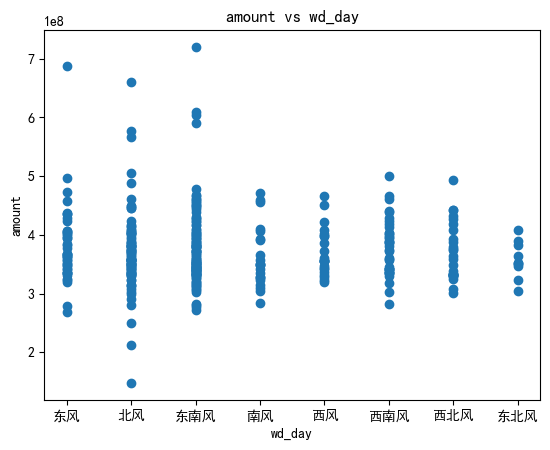

F 统计量: 0.5562588809576593
P 值: 0.7912451370933742


In [53]:
#画出散点图
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df[value_X], df[value_Y])

# 添加标题和坐标轴标签
plt.title(value_Y+' vs '+value_X)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups)

# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)

In [54]:

# <IQR法>去除所有value_Y(销量)里的异常值

# 计算指定列的下四分位数（Q1）和上四分位数（Q3）
q1 = df[value_Y].quantile(0.25)
q3 = df[value_Y].quantile(0.75)

# 计算 IQR
iqr = q3 - q1

# 定义上下界
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 删除异常值所在的行
df2 = df[(df[value_Y] >= lower_bound) & (df[value_Y] <= upper_bound)]


# 输出处理后的结果
print(df2.tail())

           date  order_cnt       amount  refuelLiters text_day text_night  \
359  2023-12-26    1072045  335929197.6   44738960.24        阴         多云   
360  2023-12-27    1054896  332618128.4   44334481.65       多云          晴   
361  2023-12-28    1032115  323028612.7   42986493.14        晴         多云   
362  2023-12-29    1218840  372592734.2   49432247.01       多云         小雨   
363  2023-12-30    1126207  341635923.3   45312200.19        阴          晴   

     high  low wc_day wd_day wc_night  encoded_wc_night wd_night week  \
359     9    0   3~4级     东风     3~4级                 1       东风  星期二   
360    12    0    <3级    西北风      <3级                 0       北风  星期三   
361    12    3   3~4级     北风      <3级                 0       东风  星期四   
362    12    5   3~4级    东南风      <3级                 0      东南风  星期五   
363    14    1    <3级    西南风     4~5级                 2      西北风  星期六   

     code_week holidays  encoded_holidays  305_price  313_price  
359          2       平时         

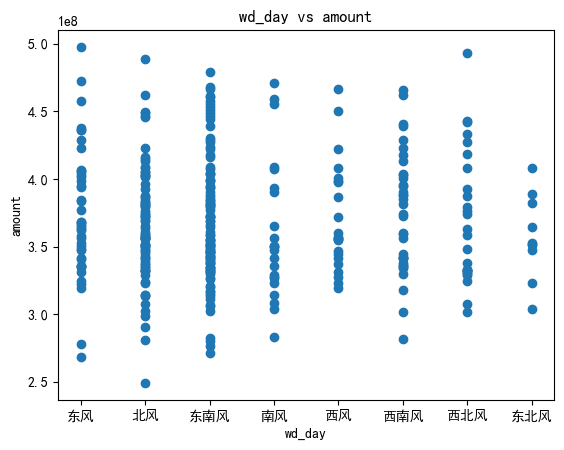

F 统计量: 0.446320308652943
P 值: 0.8724631839466136


In [55]:

coloum_groups_df2 = df2.groupby(value_X)[value_Y].apply(list)


# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df2[value_X], df2[value_Y])

# 添加标题和坐标轴标签
plt.title(value_X+' vs '+value_Y)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups_df2)

# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)